# Deep Learning MNIST Example

## <span style="font-size:25px">Deep Learning development Process (Image data)</span>

<table>
<tr style="font-size:20px">
<td style="border-right:1px solid white;text=align:center">
- 데이터 <br>정의
</td>
<td style="text-align:left;">
- TensorFlow 2.x에서는 MNIST, Fashion-MNIST, Cifar10과 같은 학습 데이터 셋은 <br>load_data()를 이용하여 불러올 수 있음. 즉 해당되는 데이터 셋을 import한 후에, <br> 다음과 같이 mnist.load_data(), fashion_mnist.load_data(), cifar10.load_data() <br>사용하여 데이터 셋을 불러올 수 있음
</td>
</td>

<table>
<tr style="font-size:20px">
<td style="border-right:1px solid white;text=align:center">
- 데이터 <br>전처리
</td>
<td style="text-align:left;">
- 학습 데이터가 이미지인 경우에는, 학습 데이터에 대한 정규화(normalization)와 <br>원핫 인코딩(one-hot encoding)과 같은 데이터 전처리(preprocessing)가 필요함. <br>일반적으로 이러한 정규화는 MinMax 또는 표준화 알고리즘을 사용하며, 원핫 인코<br>딩은 TensorFlow 2.x에서는 to_categorical() API를 이용하여 수행됨
</td>
</td>

<table>
<tr style="font-size:20px">
<td style="border-right:1px solid white;text=align:center">
- 모델 <br>구축
</td>
<td style="text-align:left;">
- 모델(model) 생성하고 model.add()를 통해서 입력층, 은닉층, 출력층을 구축함. <br>이때 은닉층 부분은 일반적인 ANN에서 Dense()를 사용하지만, CNN에서는 <br>Conv2D(), MaxPool2D(), Flatten() 등으로 은닉층 부분을 구성함.
</td>
</td>

<table>
<tr style="font-size:20px">
<td style="border-right:1px solid white;text=align:center">
- 모델 <br>컴파일
</td>
<td style="text-align:left;">
- model.compile() API를 이용하여 optimizer, loss function 등을 지정함. 이때 학습 <br>데이터의 정답을 원핫 인코딩 방식으로 설정했다면 loss function을 나타내는 <br>부분은 loss='categorical_crossentropy' 형식으로 나타내며, 원핫 인코딩 방식이 <br>아니라면 loss='sparse_categorical_crossentropy' 형식으로 지정함
</td>
</td>

<table>
<tr style="font-size:20px">
<td style="border-right:1px solid white;text=align:center">
- 학습
</td>
<td style="text-align:left;">
- model.fit() API를 이용하여 이미지 데이터에 대한 학습을 진행함
</td>
</td>

<table>
<tr style="font-size:20px">
<td style="border-right:1px solid white;text=align:center">
- 모델 <br>평가
</td>
<td style="text-align:left;">
- model.evaluate() API를 이용해서 테스트 데이터에 대한 정확도를 측정하며, 혼동 <br>행렬(confusion matrix)을 사용하던 우리가 구축한 모델(model)의 강점과 약점, 즉 <br>어떤 데이터에 대해서 우리 모델이 혼란스러워 하는 지 등을 파악 할 수 있음.
</td>
</td>

## <span style="font-size:25px">Data Preprocessing (normalization, Standardization, one-hot encoding)</span>

<dl style="border:2px dashed white;width:972.5px;font-size:20px;">
<dt>
▶ 정규화(Normalization)
</dt><br>

<dt>
- 딥러닝에서 입력 데이터의 상대적 크기에 대한 영향을 줄이기 위해서, 다음과 같은 MinMax
<br>공식을 이용해서 모든 데이터 범위를 0~1 사이의 값으로 변화시키는 과정
</dd>
</dl>

$
\text{data}_{\text{new}} = \frac{\text{data - Min}}{\text{Max - Min}}
\qquad\qquad
\boxed{
  [\, 0,\, 52,\, 255 \,] \,
  \xRightarrow{정규화} \,
  [\, 0,\, 0.2,\, 1.0 \,]
}
$

<div style="border-top: 3px dashed rgb(122, 207, 125);margin: 20px;width: 50%;"></div>


<dl style="border:2px dashed white;width:972.5px;font-size:20px;">
<dt>
▶ 표준화(Standardization)
</dt><br>

<dt>
- 딥러닝 모델이 더 높은 precision을 가질 수 있도록, 다음과 같이 데이터 평균(Mean)과
<br>표준편차(Std)를 이용하여 특정 범위를 벗어난 데이터는 outlier로 간주하여 제거하는 과정
</dd>
</dl>

$
\text{data}_{\text{new}} = \frac{\text{data - Mean}}{\text{Std}}
\qquad\qquad
\boxed{
  [\, 0,\, 52,\, 255 \,] \,
  \xRightarrow{표준화} \,
  [\, -1.13,\, -0.95,\, 1.52 \,]
}
$

<div style="border-top: 3px dashed rgb(122, 207, 125);margin: 20px;width: 50%;"></div>

<dl style="border:2px dashed white;width:972.5px;font-size:20px;">
<dt>
▶ 원핫 인코딩(One-Hot Encoding)
</dt><br>

<dt>
① 정답 개수와 동일한 크기를 가지는 리스트를 만든 후에
<br>② 정답에 해당하는 리스트의 인덱스 값에는 1을 넣고,
<br>나머지 인덱스에는 모두 0을 넣어 정답을 표현하는 방식.
<br><br>즉 리스트에서 가장 큰값을 가지는 인덱스를 정답으로 인식
</dd>
</dl>

## <span style="font-size:25px">Example</span>

<span style="font-size:20px">데이터 불러오기 및 확인</span>

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape =', x_train.shape, ', train label shape =', t_train.shape)
print('\n test shape =', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label =', t_train)   # 학습 데이터 정답 출력
print('\n test label =', t_test)     # 테스트 데이터 정답 출력

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

 train shape = (60000, 28, 28) , train label shape = (60000,)

 test shape = (10000, 28, 28) , test label shape = (10000,)

 train label = [5 0 4 ... 5 6 8]

 test label = [7 2 1 ... 4 5 6]


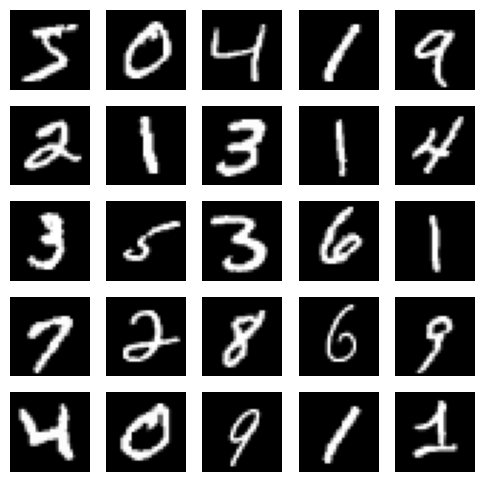

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))    # 25개의 이미지 출력

for index in range(25):

  plt.subplot(5, 5, index + 1)    # 5행, 5열, 그림 0~24까지 순서대로
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')
  # plt.title(str(t_train[index]))

plt.show()

<span style="font-size:20px">데이터 전처리(정규화, 원핫 인코딩)과, 모델 구축 및 컴파일</span>

In [3]:
# 학습 데이터/테스트 데이터 정규화(Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩(One-Hot Encoding)

from tensorflow.keras.utils import to_categorical

t_train = to_categorical(t_train, num_classes=10)
t_test = to_categorical(t_test, num_classes=10)

In [4]:
# 모델 구축

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    # Flatten 없이 사용하려면 차원이 1D이어야 한다.
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# 모델 컴파일

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

<span style="font-size:20px">데이터 학습과 평가</span>

In [8]:
# 데이터 학습

hist = model.fit(x_train, t_train, epochs=50, validation_split=0.3)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8500 - loss: 0.5279 - val_accuracy: 0.9429 - val_loss: 0.1973
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9532 - loss: 0.1614 - val_accuracy: 0.9538 - val_loss: 0.1567
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9656 - loss: 0.1156 - val_accuracy: 0.9597 - val_loss: 0.1323
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9768 - loss: 0.0783 - val_accuracy: 0.9672 - val_loss: 0.1098
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9832 - loss: 0.0595 - val_accuracy: 0.9682 - val_loss: 0.1075
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9865 - loss: 0.0465 - val_accuracy: 0.9681 - val_loss: 0.1082
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0385 - val_accuracy: 0.9687 - val_loss: 0.1106
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9918 - loss: 0.0302 - 

In [9]:
# 모델 평가

model.evaluate(x_test, t_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9762 - loss: 0.1545


[0.13604503870010376, 0.9783999919891357]

<span style="font-size:20px">데이터 손실과 정확도 트랜드</span>

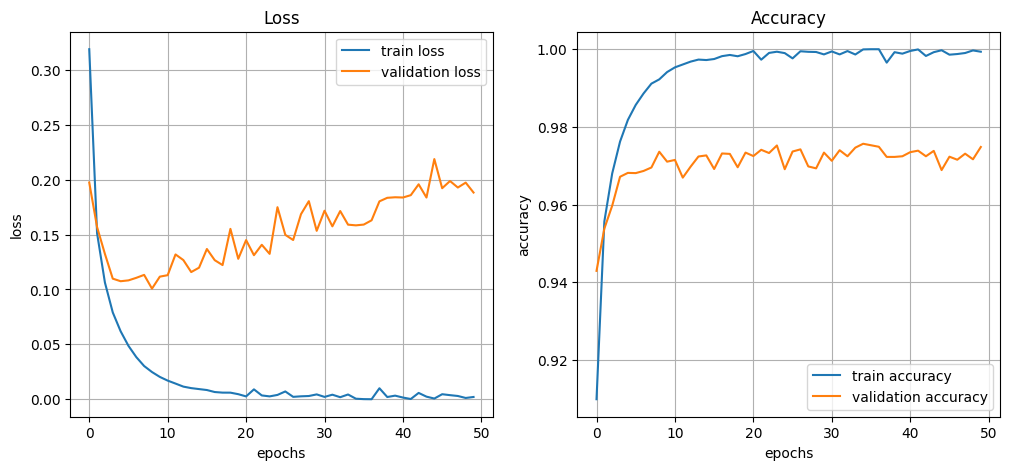

In [15]:
# 출력 방식
plt.figure(figsize=(12, 5))

# Loss Trend

plt.subplot(1, 2, 1)    # 1행, 2열, 1번째
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

# Accuarcy Trend

plt.subplot(1, 2, 2)    # 1행, 2열, 2번째
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')


plt.show()

<span style="font-size:20px">혼동 행렬(confusion matrix)</span>

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


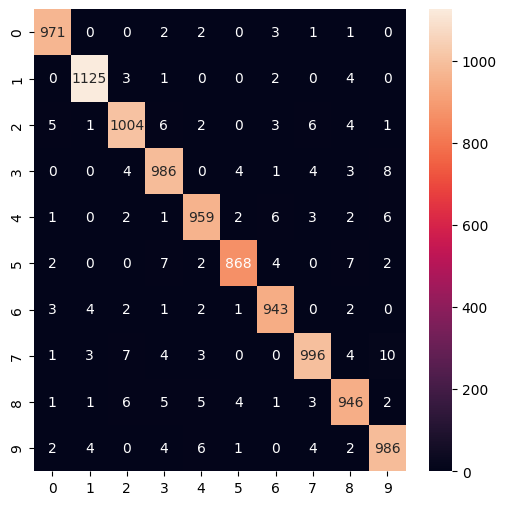

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [35]:
print(cm)
print('\n')

min_accuracy = []

for i in range(10):

  accuracy = np.max(cm[i]) / np.sum(cm[i])

  print(('label = %d\t(%d/%d)\taccuracy = %.3f') %
        (i, np.max(cm[i]), np.sum(cm[i]), accuracy))

  min_accuracy.append(accuracy)

min_accuracy_label = np.argmin(min_accuracy)

print(('가장 학습률이 떨어진 label: %d\taccuracy = %.3f') %
      (min_accuracy_label, np.min(min_accuracy)))

[[ 971    0    0    2    2    0    3    1    1    0]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   5    1 1004    6    2    0    3    6    4    1]
 [   0    0    4  986    0    4    1    4    3    8]
 [   1    0    2    1  959    2    6    3    2    6]
 [   2    0    0    7    2  868    4    0    7    2]
 [   3    4    2    1    2    1  943    0    2    0]
 [   1    3    7    4    3    0    0  996    4   10]
 [   1    1    6    5    5    4    1    3  946    2]
 [   2    4    0    4    6    1    0    4    2  986]]


label = 0	(971/980)	accuracy = 0.991
label = 1	(1125/1135)	accuracy = 0.991
label = 2	(1004/1032)	accuracy = 0.973
label = 3	(986/1010)	accuracy = 0.976
label = 4	(959/982)	accuracy = 0.977
label = 5	(868/892)	accuracy = 0.973
label = 6	(943/958)	accuracy = 0.984
label = 7	(996/1028)	accuracy = 0.969
label = 8	(946/974)	accuracy = 0.971
label = 9	(986/1009)	accuracy = 0.977
가장 학습률이 떨어진 label: 7	accuracy = 0.969
